In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib widget

from typing import List

import fmm

In [2]:
import importlib
importlib.reload(fmm)

<module 'fmm' from '/Users/liambrown/repositories/computing-project-lb880/fmm.py'>

# Changes to be made

* need to create all cells in the whole matrix
    * will invole populating all parents and children correctly etc
* hopefully this will allow full propogation of the local expansions

## Later improvements
When this has been completed, empty cells are only relevant to the local expansion, so could either make new empty cell class, or just have a matrix of the local expansions for the empty cells, will be more memory efficient, and hopefully also quicker in the end

In [3]:
class NewRootCell(fmm.RootCell):
    def __init__(self, centre: complex, size: float, precision: int, max_level: int) -> None:
        super().__init__(centre, size, precision, max_level)

    # def create_full_tree(self):
    #     def _fill_level(level):
    #         """Fill the given level, with parents in the previous"""
    #         for cell_idx in self.level_matricies[level-1][:-1,:-1].reshape(-1):
    #             cell = self.cells[cell_idx]
    #             for i in range(4):
    #                 cell._add_child(i, self.cells)
    #                 child = cell.children[i]
    #                 self.level_matricies[level][child.level_coords] = len(self.cells)-1
            
    #     for level in range(1, self.max_level + 1):
    #         _fill_level(level)

    # def populate_with_particles(self, particles:List[fmm.Particle], n_crit:int=2):
    #     for particle in particles:
    #         self._add_particle(particle,
    #                           n_crit,
    #                           self.max_level,
    #                           self.cells)

    def do_fmm(self,particles,n_crit):
        self.populate_with_particles(particles,n_crit)
        # self.print_tree()
        self.populate_multipoles()
        self.populate_level_matricies()
        self.populate_nearest_neighbours()
        self.populate_interaction_lists()
        self.populate_locals()
        self.get_particle_potentials()


In [8]:
num_particles = 500
p=4
max_level=3
n_crit=2

particles = [fmm.Particle(1) for _ in range(num_particles)]

root = NewRootCell(0.5*(1+1j),1,p,max_level)

# root.create_full_tree()
# print([matrix[:-1,:-1] for matrix in root.level_matricies])

root.do_fmm(particles,n_crit)

In [25]:
print([sum(abs(cell.multipole)) for cell in root.cells])
print(len(root.cells))

[2.7917915098514614, 0.0, 0.0, 0.0, 2.138093657989002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.1494166020477348, 1.1190706131587973, 0.0]
21


In [11]:
fmm.direct_particle_potentials(particles)

potentials = [particle.potential for particle in particles]
direct_potentials = [particle.direct_potential for particle in particles]

potential_err = list(np.array(potentials) - np.array(direct_potentials))


In [12]:
print([particle.centre for particle in particles])
print('Dir:', direct_potentials)
print('FMM:', potentials)
print('Err:', potential_err)

[(0.1170726900665433+0.7012709101226291j), (0.09439661065171179+0.2968675509842953j), (0.6926798931217133+0.9560925364378156j), (0.9766116858466471+0.7475882112489309j), (0.9927826511232348+0.8612536818987824j), (0.9107604384389842+0.7467132289151125j), (0.8975465472505099+0.9611643698809784j), (0.7924753224161475+0.6806814512114029j), (0.04961680898186127+0.9417541211712662j), (0.918311130502804+0.056602547341667364j), (0.924482931078201+0.17887223270298813j), (0.8028966165418332+0.5648944785439634j), (0.055257915314712025+0.9410961330856342j), (0.3699880039360094+0.46868477671112907j), (0.6522276228332026+0.16027868904660914j), (0.34575397567204724+0.18153926386741137j), (0.3227122305775194+0.6680889222225261j), (0.879302239899917+0.7442070492270553j), (0.6015336679440816+0.3847608266378125j), (0.8005168854922691+0.1734497200819608j), (0.27422223172931637+0.6128616952960855j), (0.6278377892715535+0.5563886149270865j), (0.970787887640939+0.45392612239917296j), (0.15220735301146682+0.9

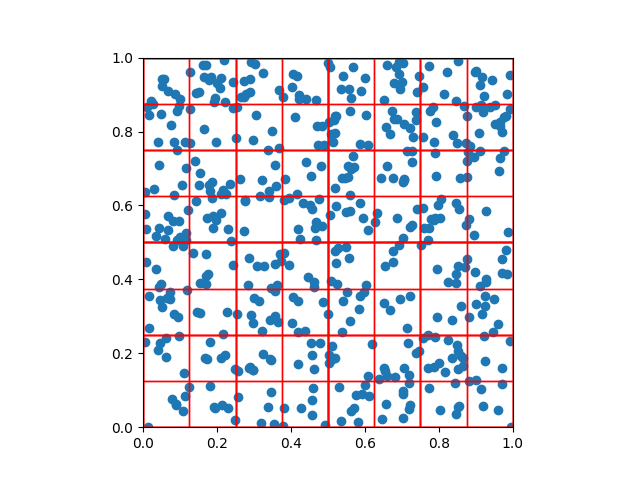

In [9]:
fmm.plot(root)

In [ ]:
for cell in root.cells[1:]:
    print(cell)
    print('\t', cell.multipole, cell.local)

print()

for particle in particles:
    print(particle.potential)

In [ ]:
# particles = []
# particles.append(Particle(1, 0.25*(1+1j)))
# particles.append(Particle(2, 0.25*(3+1j)))
# particles.append(Particle(-2, 0.25*(1+3j)))
# particles.append(Particle(-3, 0.25*(3+3j)))

# Expect -2, 2i, (1/8)i, 0.8333i

In [ ]:
for cell in cells:
    cell.multipole = np.zeros(p,dtype=complex)

root._calculate_multipole()
direct = root.multipole

root.multipole = np.zeros(p, dtype=complex)

for cell in reversed(cells):
    cell.get_multipole()
M2M = root.multipole

err = (M2M - direct)/abs(direct)
print(direct)
print(M2M)
print(err)
np.sum(abs(err))

In [ ]:
"""Shows numpy method is equivalent to explicit"""

z0 = -1+2j
precision = 3

multipole_for = np.zeros(precision, dtype=complex)
multipole_np = np.zeros(precision, dtype=complex)

child_multipole_real = np.random.random(precision)
child_multipole_imag = np.random.random(precision)
child_multipole = child_multipole_real + 1j*child_multipole_imag
child_multipole[0] = child_multipole[0].real

multipole_for[0] += child_multipole[0]
multipole_np[0] += child_multipole[0]

for l in range(1, precision):
    bl = - child_multipole[0] * z0**l / l
    for k in range(1,l+1):
        bl += child_multipole[k] * z0**(l-k) * sp.special.binom(l-1,k-1)
    multipole_for[l] += bl

    multipole_np[l] += \
    -(child_multipole[0] * z0**l / l) \
        + np.sum(child_multipole[1:l+1] \
                    * z0**(l-np.arange(1,l+1,1)) \
                    * sp.special.binom(l-1, np.arange(0,l,1)))

    
print(multipole_for)
print(multipole_np)